# Phyiscs Problems - Lectures 18 & 19 - Homework 9 

FALL 2023


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a program that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [138]:
import numpy as np
G = 6.67*10**-11  #[m^3/(kg*s)]
M = 5.97*10**24   #[kg]
R = 6371*1000     #[m]
T = float(input("input desired time of orbit: "))

h = ((G*M*(T**2))/(4*np.pi**2))**(1/3) - R
print(h)

input desired time of orbit: 5000
-53283.32386029605


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [139]:
T = 24*3600  #[s]
h = ((G*M*(T**2))/(4*np.pi**2))**(1/3) - R
print(str(h/1000)+" km above Earth's surface for geosynchronous orbit")


T = 90*60  #[s]
h = ((G*M*(T**2))/(4*np.pi**2))**(1/3) - R
print(str(h/1000)+" km above Earth's surface for 90 minute orbit")


T = 45*60  #[s]
h = ((G*M*(T**2))/(4*np.pi**2))**(1/3) - R
print(str(h/1000)+" km above Earth's surface for 45 minute orbit")

#the closer you are to earth's surface, the faster the orbit will be
#this equation even calculates impossible times for an orbit

35855.91017617497 km above Earth's surface for geosynchronous orbit
279.32162537285967 km above Earth's surface for 90 minute orbit
-2181.5598978108233 km above Earth's surface for 45 minute orbit


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [140]:
T = 24*3600  #[s]
h1 = ((G*M*(T**2))/(4*np.pi**2))**(1/3) - R  #[m]
h_24hrs = h1/1000  #[km]
print(str(h_24hrs)+" km above Earth's surface for a 24 hour orbit")

T = 23.93*3600  #[s]
h2 = ((G*M*(T**2))/(4*np.pi**2))**(1/3) - R #[m]
h_actual = h2/1000  #[km]
print(str(h_actual)+" km above Earth's surface for a 23.93 hour orbit")

percent_dif = (h_24hrs-h_actual)*100/h_actual
difference = h_24hrs-h_actual
print(str(percent_dif)+"% difference between the altitudes of the two orbits")
print(str(difference) + "km difference between the altitudes in total")


35855.91017617497 km above Earth's surface for a 24 hour orbit
35773.762329895646 km above Earth's surface for a 23.93 hour orbit
0.22963155376775682% difference between the altitudes of the two orbits
82.14784627932386km difference between the altitudes in total


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

Text(0, 0.5, 'Altitude of Orbit(km)*10^4')

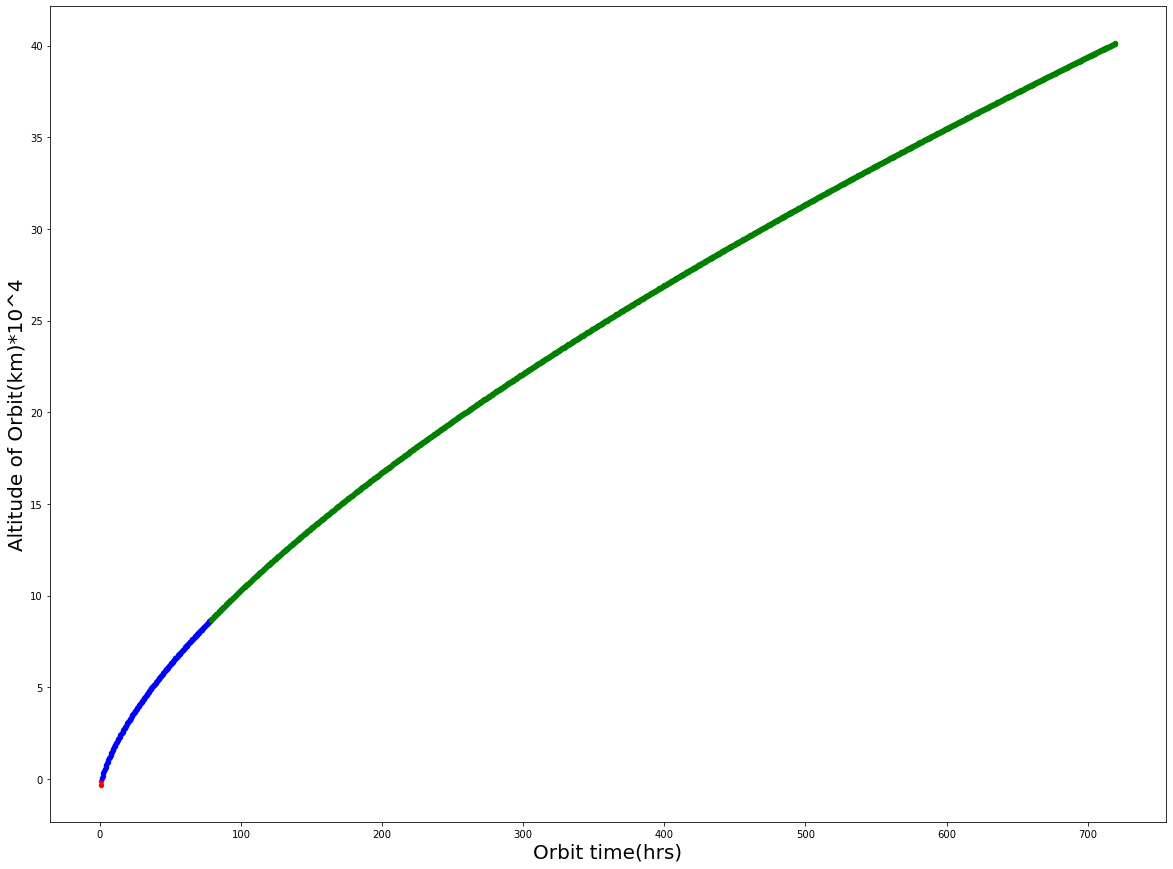

In [141]:
from matplotlib import pyplot as plt
T_begin = 1800  #[s]
T_end = 30*24*3600  #[s]
h = []
T = []
for i in range(T_begin,T_end,T_begin):
    T.append(i/3600)  #[hr]
    height = ((G*M*(i**2))/(4*np.pi**2))**(1/3) - R  #[m]
    h.append(height/1000)  #[km]
    
height = np.array(h)
time = np.array(T)
height_negative = height[height<0]
time_negative = time[height<0]
height_sec2 = height[(0<=height) & (height<86400)]
time_sec2 = time[(0<=height) & (height<86400)]
height_sec3 = height[height>=86400]
time_sec3 = time[height>=86400]


fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(time_negative,height_negative/10000,s=20,c='r')
ax.scatter(time_sec2,height_sec2/10000,s=20,c='b')
ax.scatter(time_sec3,height_sec3/10000,s=20,c='g')
ax.set_xlabel("Orbit time(hrs)",size=20)
ax.set_ylabel("Altitude of Orbit(km)*10^4",size=20)




### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [142]:
import numpy as np

c = 3.0*10**8  #[m/s]
#v = float(input("velocity as a ratio of the speed of light: ")) * c
#x = float(input("position in light years: "))

def transform(x,v):
    gama = 1/(np.sqrt(1-(v**2)))
    t_earth = x/v
    t_prime = gama *(t_earth - v*x)
    return t_earth, t_prime


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [143]:
print(transform(10,0.9))
print(transform(10,0.98))
print(transform(10,0.999))

(11.11111111111111, 4.843221048378526)
(10.204081632653061, 2.0305866063400337)
(10.01001001001001, 0.4475493274496109)


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [145]:
import numpy as np

a = float(input("a = "))
b = float(input("b = "))
c = float(input("c = "))

def x1(a,b,c):
    x1_plus = ((-b)+np.sqrt(b**2-4*a*c))/(2*a)
    x1_minus = ((-b)-np.sqrt(b**2-4*a*c))/(2*a)
    return x1_plus,x1_minus
print(x1(a,b,c))

a = 1
b = 10
c = 24


NameError: name 'x1_plus' is not defined

There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [111]:
a=.001
b=1000
c=.001
def x1(a,b,c):
    x1_plus = ((-b)+np.sqrt(b**2-4*a*c))/(2*a)
    x1_minus = ((-b)-np.sqrt(b**2-4*a*c))/(2*a)
    return x1_plus,x1_minus
def x2(a,b,c):
    x2_plus = ((2*c)/(-b+np.sqrt(b**2-4*a*c)))
    x2_minus = ((2*c)/(-b-np.sqrt(b**2-4*a*c)))
    return x2_minus,x2_plus
print(x1(a,b,c))
print(x2(a,b,c))

#precission of the machine from how we approach our correct number

(-9.999894245993346e-07, -999999.999999)
(-1.000000000001e-06, -1000010.5755125057)


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases.

In [112]:
a=.001
b=1000
c=.001
def x1(a,b,c):
    x1_plus = ((-b)+np.sqrt(b**2-4*a*c))/(2*a)
    x1_minus = ((-b)-np.sqrt(b**2-4*a*c))/(2*a)
    if x1_minus<10**-5:
        x1_minus = 0
    if x1_plus - 1000000 < 20:
        x1_plus = 1000000    
    return x1_plus,x1_minus
def x2(a,b,c):
    x2_plus = ((2*c)/(-b+np.sqrt(b**2-4*a*c)))
    x2_minus = ((2*c)/(-b-np.sqrt(b**2-4*a*c)))
    if x2_minus<10**-5:
        x2_minus = 0
    if x2_plus - 1000000 < 20:
        x2_plus = -1000000
    return x2_minus,x2_plus

print(x1(a,b,c))
print(x2(a,b,c))

(1000000, 0)
(0, -1000000)


### 4) Planetary orbits

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $l_1$ of closest approach that a planet makes to the Sun, also called its perihelion, and its linear velocity $v_1$ at *perihelion*, then any other property of the orbit can be calculated from these two as follows.

Kepler’s second law tells us that the distance $l_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $l_2 v_2 = l_1 v_1$. 


Given the values of $v_1$, $l_1$, and $l_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler’s laws and the fact that the orbit is an ellipse:

Semi-Major Axis $$ a = \frac{1}{2} (l_1 + l_2) $$ 
Semi-Minor Axis: $$ b = \sqrt{l_1  l_2} $$ 
Orbital Period: $$ T = \frac{2 \pi a b}{l_1 v_1} $$ 
Orbital eccentricity:  $$ e = \frac{l_2 - l_1}{l_2 + l_1}$$

#### Write a program with functions that asks the user to enter the distance to the Sun and velocity at perihelion, then calculates and prints the quantities $l2$, $v2$, $a$, $b$, $T$, and $e$.




In [113]:
import numpy as np

def properties(a,b,c,v1,l1):
    v2_plus = ((-b)+np.sqrt(b**2-4*a*c))/(2*a)
    v2_minus = ((-b)-np.sqrt(b**2-4*a*c))/(2*a)
    if v2_plus > 0:
        v2 = v2_plus
    else:
        v2 = v2_minus
    l2 = v1*l1/v2
    a = .5*(l1+l2)
    b = np.sqrt(l1*l2)
    T = 2*np.pi*a*b/(l1*v1)
    e = (l2-l1)/(l2+l1)
    return(v2,l2,a,b,T,e)


#### Test your program by having it calculate the properties of the orbits of the Earth (for which $l_1 = 1.4710 \times 10^{11}$ m and $v_1 = 3.0287 \times 10^4$ m s$^{−1}$ ) and Halley’s comet ($l_1 = 8.7830 \times 10^{10}$ m and $v_1 = 5.4529 \times 10^4$ m s${−1}$ ). Among other things, you should find that the orbital period of the Earth is one year and that of Halley’s comet is about 76 years.

In [89]:
G = 6.67*10**-11  #[m^3/(kg*s)]
M = 1.989*10**30  #[kg]

v_earth = 3.0287*10**4  #[m/s]
l_earth = 1.4710*10**11  #[m]
a_earth = 1
b_earth = 2*G*M/(l_earth*v_earth) #[m/s]
c_earth = v_earth**2-(2*G*M/l_earth) #[m^2/s^2]


v_halley = 5.4529*10**4  #[m/s]
l_halley = 8.7830*10**10 #[m]
a_halley = 1
b_halley = 2*G*M/(v_halley*l_halley)
c_halley = v_halley**2-(2*G*M/l_halley)

v2_earth, l2_earth, a_e, b_e, T_earth, ecc_earth = properties(a_earth,b_earth,c_earth,v_earth,l_earth)
v2_halley, l2_halley, a_h, b_h, T_halley, ecc_halley = properties(a_halley,b_halley,c_halley,v_halley,l_halley)
print("following v2, l2, a, b, T, and e of earth are as follows:")
print(v2_earth, l2_earth, a_e, b_e, T_earth, ecc_earth)
print("following v2, l2, a, b, T, and e of halley's comet are as follows:")
print(v2_halley, l2_halley, a_h, b_h, T_halley, ecc_halley)

following v2, l2, a, b, T, and e of earth are as follows:
12331.2630502861 361294514749.37384 254197257374.68692 230535080019.57727 82645425.30657384 0.421315550296538
following v2, l2, a, b, T, and e of halley's comet are as follows:
845.6861522101499 5663190839158.829 2875510419579.4146 705264525836.4552 2660580708.32028 0.9694558575055184
